In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df= df.rename(columns = {'spam': 'target'})

In [6]:
df.duplicated().sum()

33

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5695 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   target  5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


In [9]:
#EDA
df['target'].value_counts()

target
0    4327
1    1368
Name: count, dtype: int64

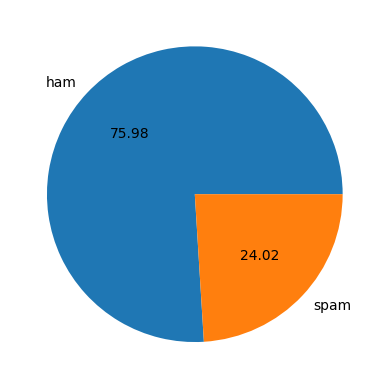

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%.2f")
plt.show()

In [11]:
import nltk
#nltk.download('punkt')

In [12]:
df['num_char'] = df['text'].apply(len)

In [13]:
df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [14]:
df['num_sent']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5695 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5695 non-null   object
 1   target     5695 non-null   int64 
 2   num_char   5695 non-null   int64 
 3   num_words  5695 non-null   int64 
 4   num_sent   5695 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 267.0+ KB


In [16]:
df[df['target']==1].describe()

,target,num_char,num_words,num_sent
count,1368.0,1368.000000,1368.000000,1368.000000
mean,1.0,1317.257310,267.896199,18.274123
std,0.0,2271.372893,451.623124,28.130434
min,1.0,18.000000,5.000000,1.000000
25%,1.0,401.500000,80.000000,6.000000
50%,1.0,693.500000,141.000000,11.000000
75%,1.0,1250.250000,252.000000,18.000000
max,1.0,28432.000000,6131.000000,438.000000


In [17]:
df[df['target']==0].describe()

,target,num_char,num_words,num_sent
count,4327.0,4327.000000,4327.000000,4327.000000
mean,0.0,1634.200139,347.283799,19.838225
std,0.0,1965.016383,407.227757,38.124564
min,0.0,13.000000,3.000000,1.000000
25%,0.0,577.500000,120.000000,7.000000
50%,0.0,1122.000000,240.000000,13.000000
75%,0.0,2037.500000,440.500000,22.000000
max,0.0,43952.000000,8479.000000,1565.000000


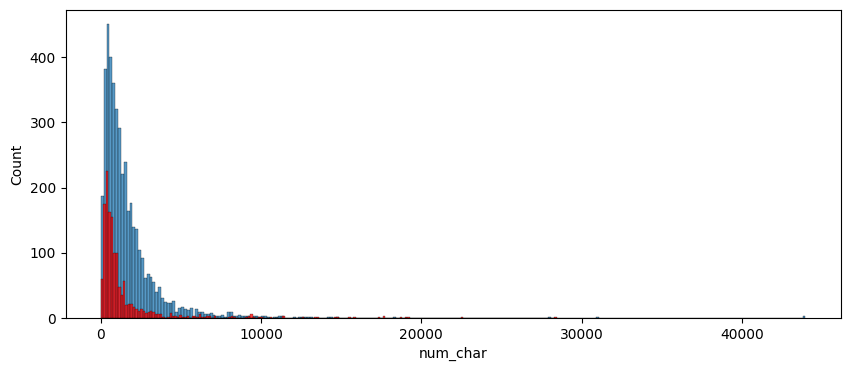

In [18]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color ='red')
plt.show()

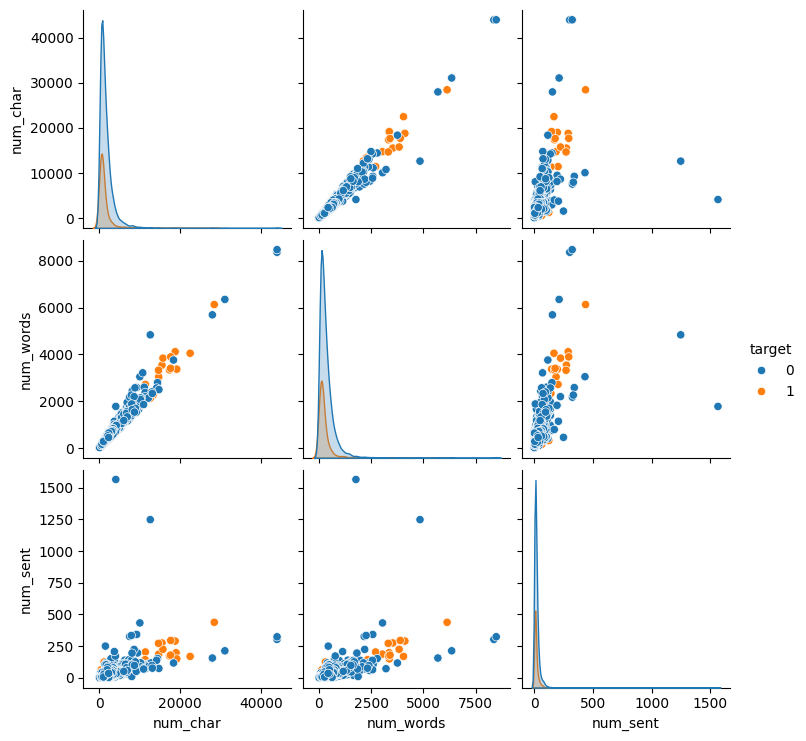

In [19]:
sns.pairplot(df, hue = 'target')

<Axes: >

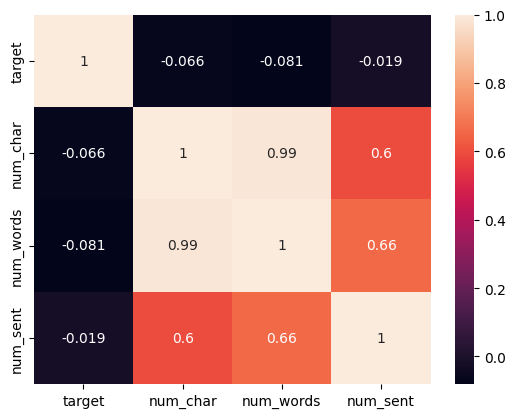

In [20]:
sns.heatmap(df[['target','num_char','num_words','num_sent']].corr(), annot= True)

In [21]:
# data preprocessing
# 1.lower case
# 2.tokenisation
# 3.removing special characters
# 4.removing stop words and punctuation
# 5.stemming

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def transform_text(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    words=[]
    for word in text:
        if word.isalnum():
            words.append(word)
    text = words[:]
    words.clear()
    for word in text:
        if word not in stopwords.words('english'):
            words.append(word)
    
    text = words[:]
    words.clear()
    ps =PorterStemmer()
    for word in text:
        words.append(ps.stem(word))

    return " ".join(words)

In [23]:
transform_text("i am gooding boy you %jgr pri i gopod ? ... looking")

'good boy jgr pri gopod look'

In [24]:
transform_text(df['text'][0])

'subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest'

In [26]:
df['transformed_text'] = df['text'].apply(transform_text)

In [27]:
df.head()

,text,target,num_char,num_words,num_sent,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width =500 , height =500, min_font_size=10, background_color = 'white')

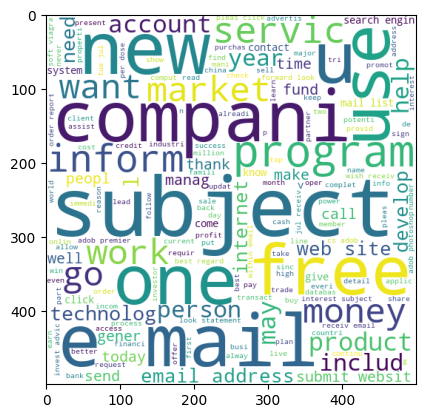

In [35]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

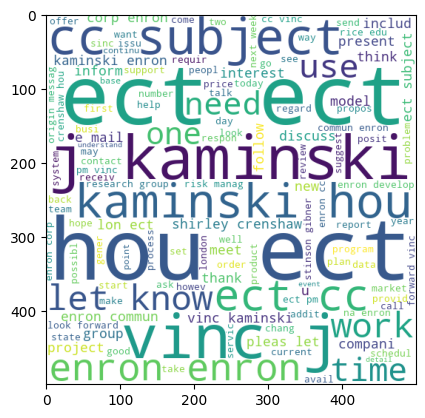

In [36]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [52]:
spam_corpus=[]
ham_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split(" "):
        spam_corpus.append(word)

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split(" "):
        ham_corpus.append(word)

In [53]:
from collections import Counter
Counter(spam_corpus).most_common(30)
Counter(ham_corpus).most_common(30)

[('enron', 13335),
 ('ect', 11410),
 ('subject', 8565),
 ('vinc', 8468),
 ('hou', 5567),
 ('2000', 4932),
 ('kaminski', 4754),
 ('pleas', 4440),
 ('com', 4397),
 ('would', 4124),
 ('cc', 3862),
 ('j', 3669),
 ('thank', 3537),
 ('pm', 3247),
 ('2001', 3021),
 ('forward', 2943),
 ('research', 2713),
 ('time', 2534),
 ('meet', 2520),
 ('1', 2471),
 ('group', 2451),
 ('know', 2329),
 ('manag', 2326),
 ('2', 2295),
 ('work', 2265),
 ('10', 2206),
 ('price', 2164),
 ('model', 2153),
 ('market', 2134),
 ('energi', 2112)]

In [54]:
# model building

In [106]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer()

In [107]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
X.shape

(5695, 29220)

In [109]:
Y = df['target'].values

In [110]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb =MultinomialNB()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear')
svc =SVC(kernel='sigmoid', gamma =1.0)
dtc =DecisionTreeClassifier(max_depth=5)
rfc =RandomForestClassifier(n_estimators= 50 ,random_state= 2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc =GradientBoostingClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc =ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [114]:
model_list =[mnb, bnb, lrc, rfc, etc]

In [115]:
def train_classifier(clf , X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy= accuracy_score(Y_test, Y_pred)
    precision =precision_score(Y_test, Y_pred)
    
    return accuracy, precision

In [103]:
accuracy_scores=[]
precision_scores=[]

for clf in model_list:
    c_accuracy,c_precision = train_classifier(clf , X_train, Y_train, X_test, Y_test)
    accuracy_scores.append(c_accuracy)
    precision_scores.append(c_precision)
    print(clf)
    print('accuracy', c_accuracy)
    print('precision', c_precision)

MultinomialNB()
accuracy 0.8770851624231782
precision 0.987012987012987
BernoulliNB()
accuracy 0.9885864793678666
precision 0.9859649122807017
LogisticRegression(solver='liblinear')
accuracy 0.9762949956101844
precision 1.0
RandomForestClassifier(n_estimators=50, random_state=2)
accuracy 0.9762949956101844
precision 1.0
ExtraTreesClassifier(n_estimators=50, random_state=2)
accuracy 0.9675153643546971
precision 1.0


In [104]:
performance_df1 =pd.DataFrame({
    'algorithm': model_list,
    'accuracy': accuracy_scores,
    'precision': precision_scores
})

In [93]:
performance_df.sort_values(by= 'precision')

,algorithm,accuracy,precision
4,"SVC(gamma=1.0, kernel='sigmoid')",0.819140,0.669355
5,DecisionTreeClassifier(max_depth=5),0.913960,0.801887
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.968393,0.912338
9,(DecisionTreeClassifier(random_state=114693939...,0.971027,0.941581
0,GaussianNB(),0.951712,0.943396
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.958736,0.961977
11,"XGBClassifier(base_score=None, booster=None, c...",0.989464,0.963333
1,MultinomialNB(),0.992976,0.979592
2,BernoulliNB(),0.988586,0.985965
6,"(DecisionTreeClassifier(max_features='sqrt', r...",0.972783,0.992395


In [105]:
performance_df1.sort_values(by= 'precision')

,algorithm,accuracy,precision
1,BernoulliNB(),0.988586,0.985965
0,MultinomialNB(),0.877085,0.987013
2,LogisticRegression(solver='liblinear'),0.976295,1.000000
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.976295,1.000000
4,"(ExtraTreeClassifier(random_state=1872583848),...",0.967515,1.000000


In [116]:
train_classifier(rfc , X_train, Y_train, X_test, Y_test)

(0.9762949956101844, 1.0)

In [118]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))

In [123]:
df[df['target']==1]['text'][7]

'Subject: save your money buy getting this thing here  you have not tried cialls yet ?  than you cannot even imagine what it is like to be a real man in bed !  the thing is that a great errrectlon is provided for you exactiy when you want .  cialis has a lot of advantages over viagra  - the effect iasts 36 hours !  - you are ready to start within just 10 minutes !  - you can mix it with aicohol ! we ship to any country !  get it right now ! . '

In [122]:
df['target'].value_counts()

target
0    4327
1    1368
Name: count, dtype: int64